In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the data
file_path = 'C:/Users/User/Downloads/census_income_data.csv'
df = pd.read_csv(file_path, encoding='ascii')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,AAGE,ACLSWKR,ADTINK,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,AHRSPAY,year,income_bracket
0,73,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0,94,-50000
2,18,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,0,95,-50000
3,9,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000
4,10,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000


In [4]:
# Summary statistics of the DataFrame
df.describe(include='all')

,AAGE,ACLSWKR,ADTINK,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,AHRSPAY,year,income_bracket
count,199523.000000,199523,199523.000000,199523.000000,199523,199523,199523,199523,199523,199523,...,193404,196130,199523,199523.000000,199523,199523.000000,199523.000000,199523.000000,199523.000000,199523
unique,NaN,9,NaN,NaN,17,3,7,24,15,5,...,42,42,5,NaN,3,NaN,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,NaN,-50000
freq,NaN,100245,NaN,NaN,48407,186943,86485,100684,100684,167365,...,160479,176989,176992,NaN,197539,NaN,NaN,NaN,NaN,187141
mean,34.494199,NaN,15.352320,11.306556,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.175438,NaN,1.514833,23.174897,55.426908,94.499672,NaN
std,22.310895,NaN,18.067129,14.454204,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.553694,NaN,0.851473,24.411488,274.896454,0.500001,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,94.000000,NaN
25%,15.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,0.000000,94.000000,NaN
50%,33.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,0.000000,94.000000,NaN
75%,50.000000,NaN,33.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,0.000000,95.000000,NaN


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Check for outliers in continuous variables
def find_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data < lower_bound) | (data > upper_bound)]

# Find outliers in continuous variables
outliers_capgain = find_outliers(df['CAPGAIN'])
outliers_gaploss = find_outliers(df['GAPLOSS'])
outliers_divval = find_outliers(df['DIVVAL'])

print('Outliers in CAPGAIN:', outliers_capgain.describe())
print('Outliers in GAPLOSS:', outliers_gaploss.describe())
print('Outliers in DIVVAL:', outliers_divval.describe())

GRINST        708
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSUN      99696
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
dtype: int64
Outliers in CAPGAIN: count     7379.000000
mean     11754.497493
std      21533.053259
min        114.000000
25%       2964.000000
50%       5178.000000
75%      10520.000000
max      99999.000000
Name: CAPGAIN, dtype: float64
Outliers in GAPLOSS: count    3906.000000
mean     1906.031490
std       463.154428
min       155.000000
25%      1669.000000
50%      1887.000000
75%      2001.000000
max      4608.000000
Name: GAPLOSS, dtype: float64
Outliers in DIVVAL: count    21141.000000
mean      1864.229932
std       5835.216597
min          1.000000
25%         82.000000
50%        301.000000
75%       1362.000000
max      99999.000000
Name: DIVVAL, dtype: float64


In [6]:
# Removing columns with extremely high missing values
df_cleaned = df.drop(columns=['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN'])

# Display the updated dataframe to confirm removal
print(df_cleaned.columns)

Index(['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'AHRSPAY', 'year', 'income_bracket'],
      dtype='object')


In [7]:
# Impute missing values using the mode for categorical columns
columns_to_impute = ['GRINST', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY']
for column in columns_to_impute:
    mode_value = df_cleaned[column].mode()[0]  # Get the most frequent value
    df_cleaned[column].fillna(mode_value, inplace=True)

# Check if there are any remaining missing values in these columns
df_missing_after_imputation = df_cleaned[columns_to_impute].isnull().sum()
print(df_missing_after_imputation)

GRINST      0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
dtype: int64


In [8]:
df_cleaned.isnull().sum()

AAGE              0
ACLSWKR           0
ADTINK            0
ADTOCC            0
AHGA              0
AHSCOL            0
AMARITL           0
AMJIND            0
AMJOCC            0
ARACE             0
AREORGN           0
ASEX              0
AUNMEM            0
AUNTYPE           0
AWKSTAT           0
CAPGAIN           0
GAPLOSS           0
DIVVAL            0
FILESTAT          0
GRINREG           0
GRINST            0
HHDFMX            0
HHDREL            0
MARSUPWRT         0
MIGSAME           0
NOEMP             0
PARENT            0
PEFNTVTY          0
PEMNTVTY          0
PENATVTY          0
PRCITSHP          0
SEOTR             0
VETQVA            0
VETYN             0
WKSWORK           0
AHRSPAY           0
year              0
income_bracket    0
dtype: int64

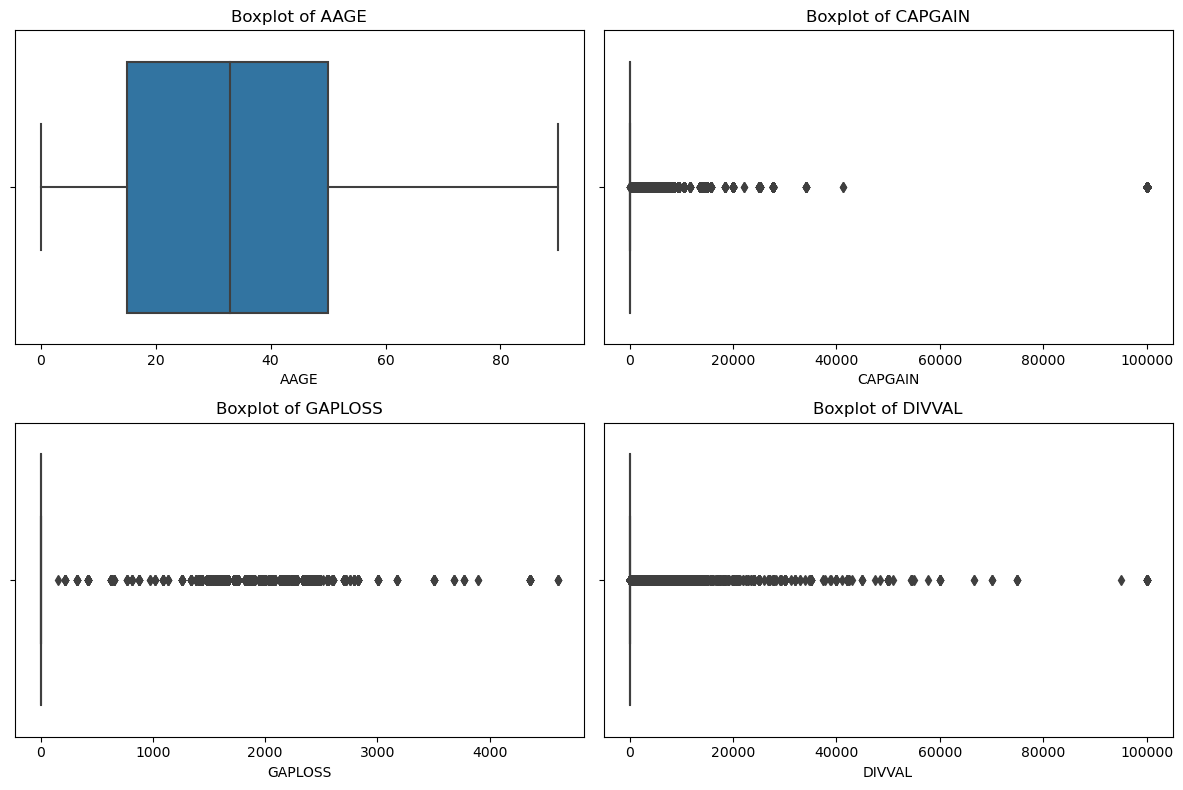

In [9]:
# Plotting boxplots to visualize outliers in corrected numerical columns
columns_to_check = ['AAGE', 'CAPGAIN', 'GAPLOSS', 'DIVVAL']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

AAGE (Age): There are no significant outliers visible.

CAPGAIN (Capital Gains) and GAPLOSS (Capital Losses): Both show a large number of outliers at higher values, which is typical for financial data where most values are zero or near zero, but a few can be extremely high.

DIVVAL (Dividend Value): Similar to capital gains and losses, most values are zero with a few high outliers.

In [10]:
# Encoding categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column])
    label_encoders[column] = le

print('Categorical variables have been encoded.')

Categorical variables have been encoded.


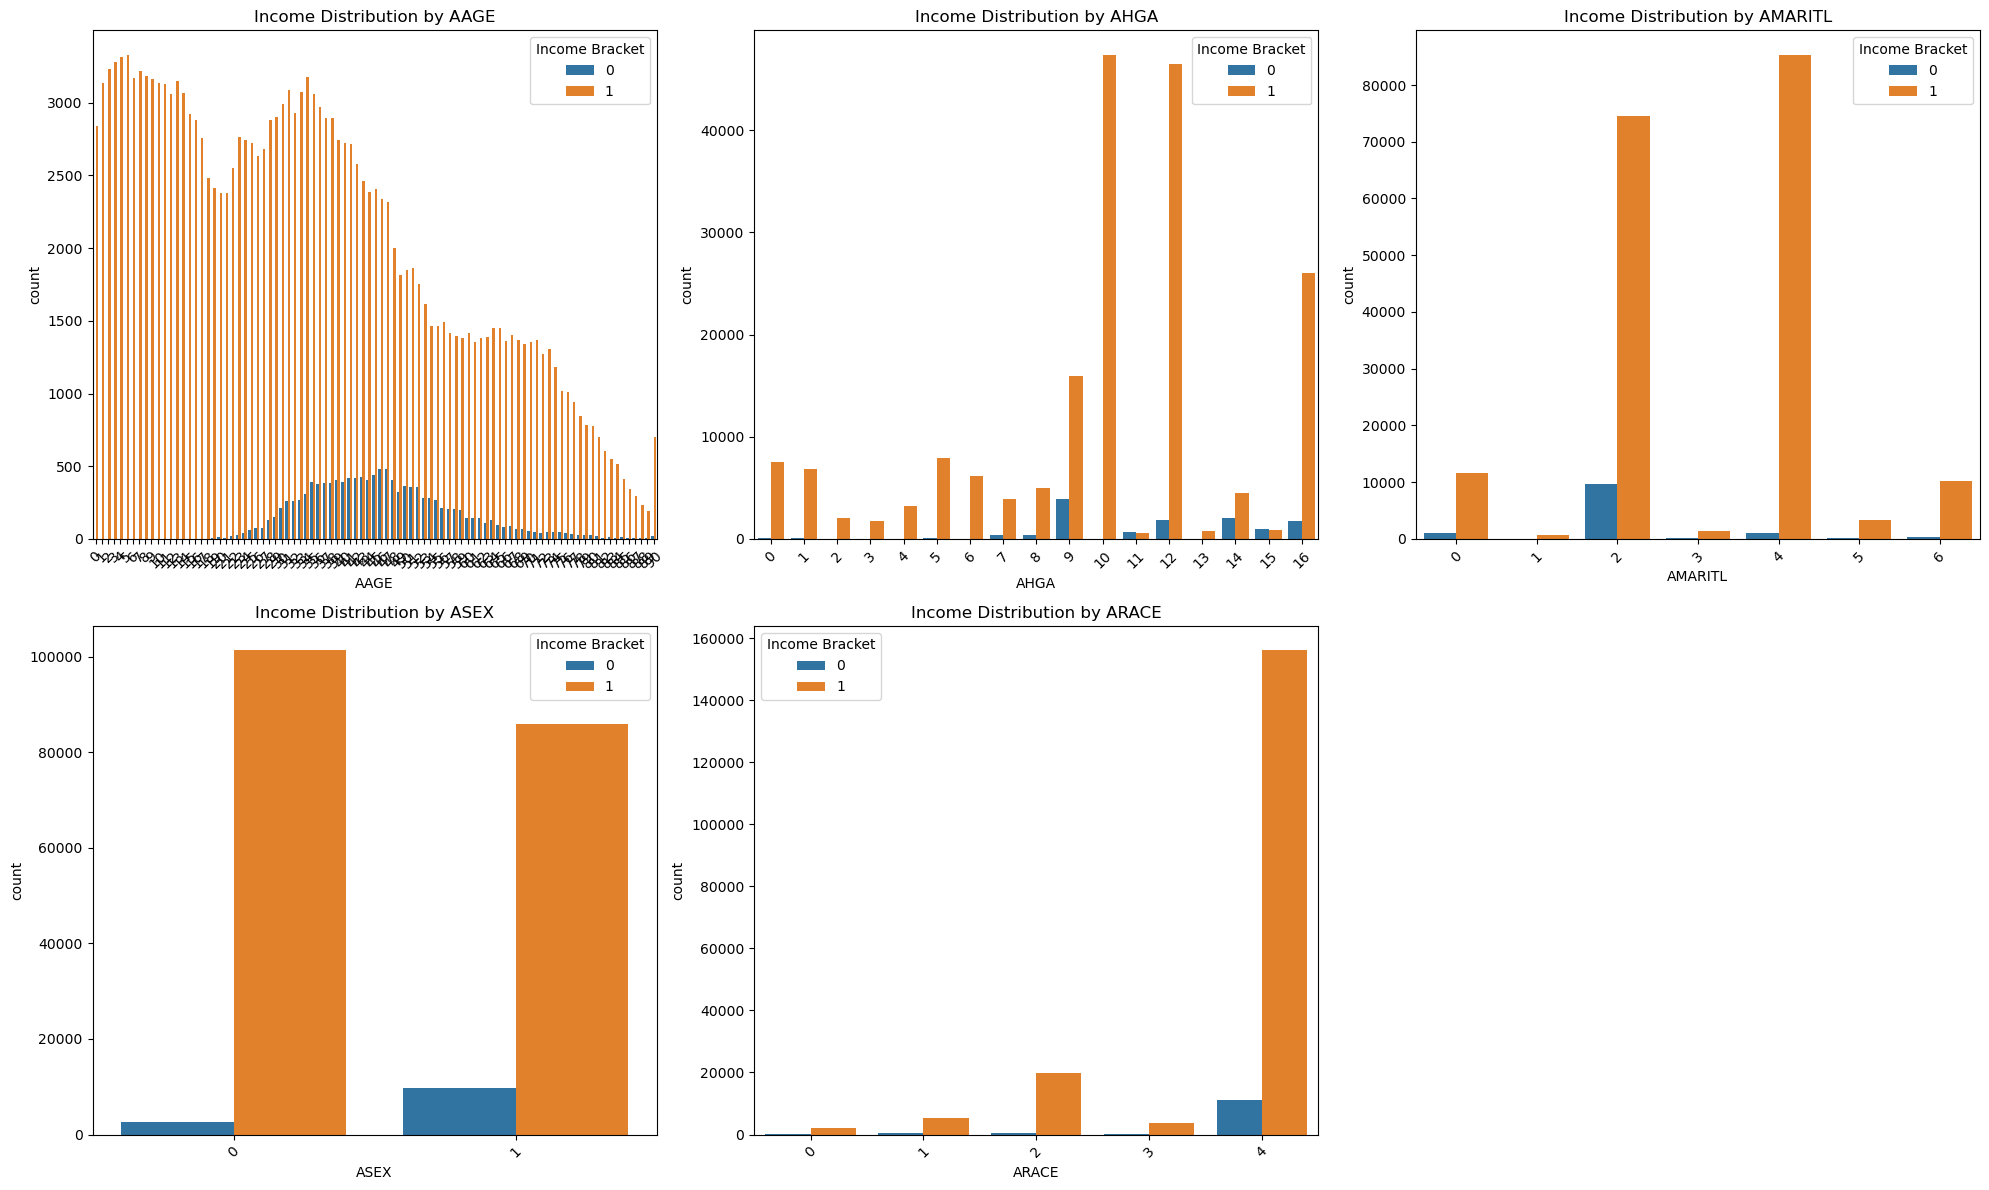

In [11]:
# Visualizing income distribution across different demographic groups
demographic_columns = ['AAGE', 'AHGA', 'AMARITL', 'ASEX', 'ARACE']

plt.figure(figsize=(20, 12))
for i, column in enumerate(demographic_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='income_bracket', data=df_cleaned)
    plt.title(f'Income Distribution by {column}')
    plt.xticks(rotation=45)
    plt.legend(title='Income Bracket')

plt.tight_layout()
plt.show()

Age (AAGE): Income distribution appears to vary significantly with age, suggesting different income levels at different stages of life.

Education (AHGA): There are clear differences in income distribution across educational levels, indicating that higher education might correlate with higher income brackets.

Marital Status (AMARITL): Marital status also shows variation in income levels, potentially reflecting combined household incomes or stability provided by marital partnerships.

Sex (ASEX): The distribution between different income brackets varies by sex, which could be indicative of existing wage gaps.

Race (ARACE): Income distribution across races shows some disparities, which could be explored further for insights into socio-economic diversity and inequality.

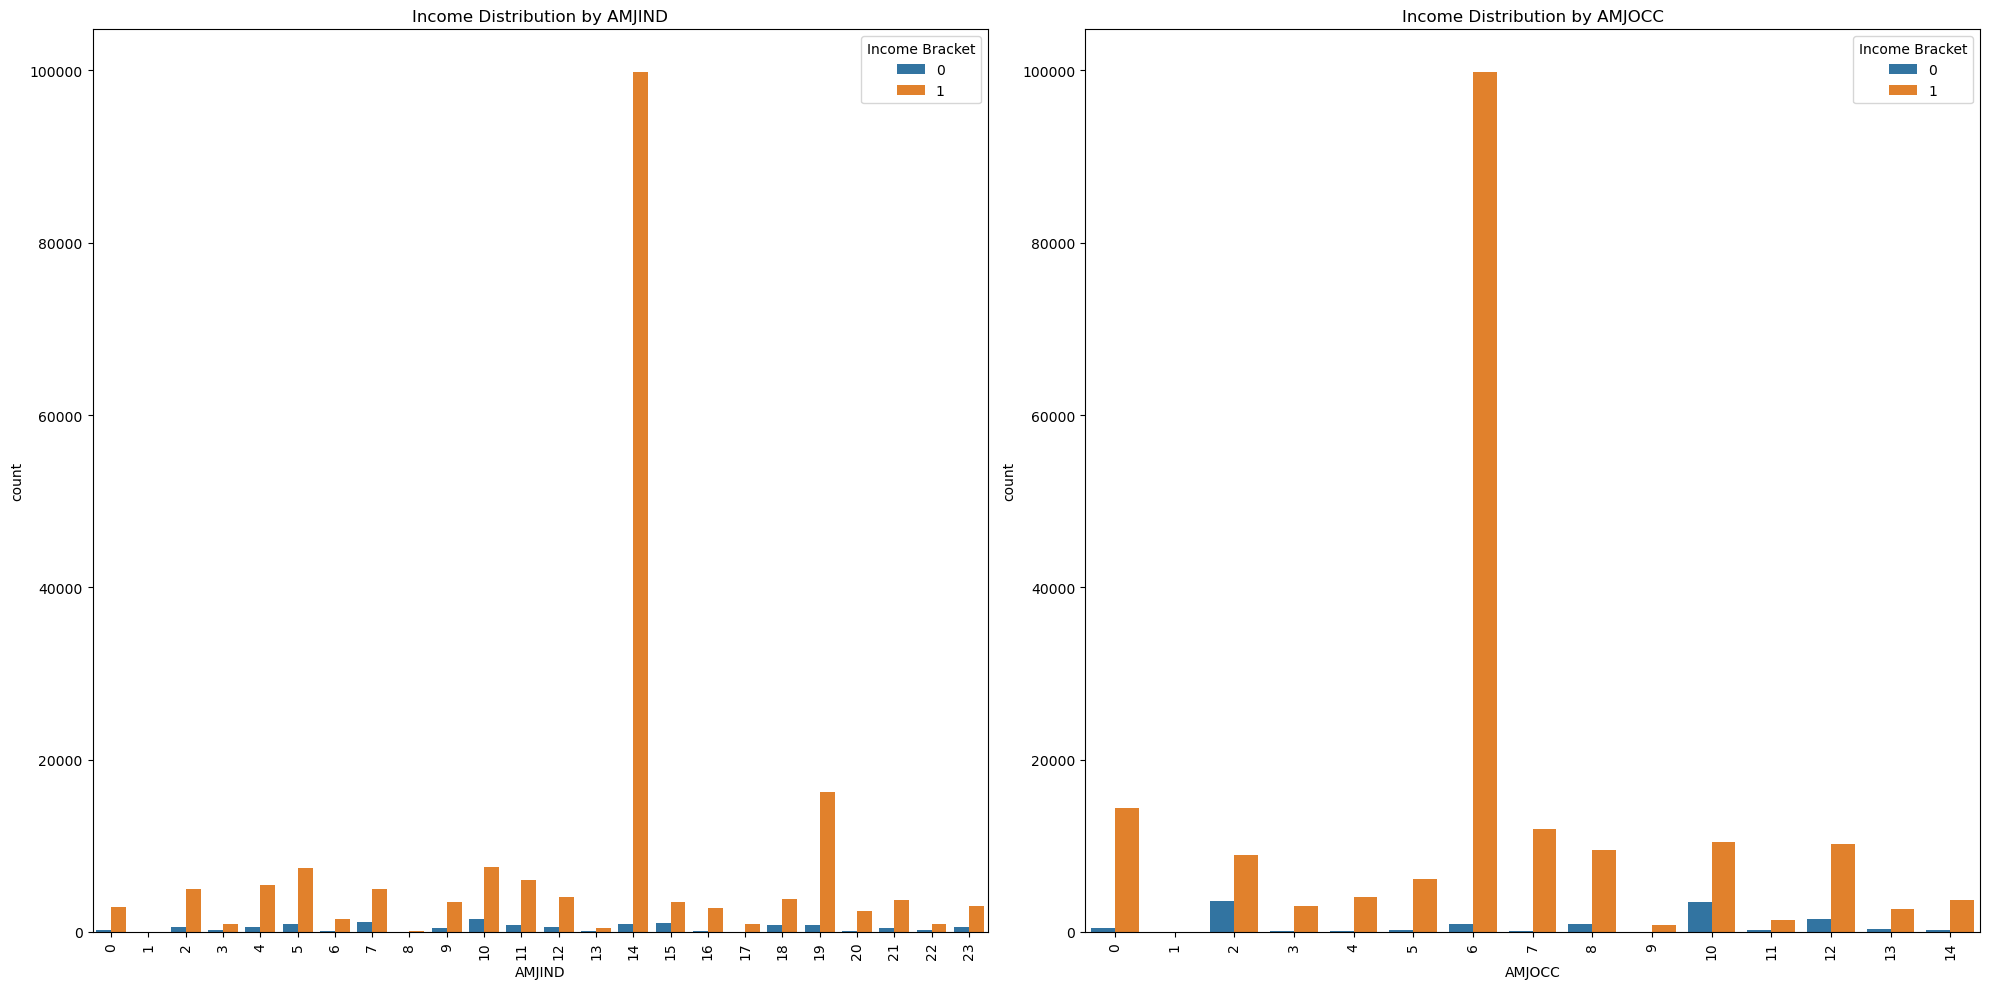

In [12]:
# Visualizing income distribution across occupation and industry
economic_columns = ['AMJIND', 'AMJOCC']

plt.figure(figsize=(20, 10))
for i, column in enumerate(economic_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=column, hue='income_bracket', data=df_cleaned)
    plt.title(f'Income Distribution by {column}')
    plt.xticks(rotation=90)
    plt.legend(title='Income Bracket')

plt.tight_layout()
plt.show()

Industry (AMJIND): The income distribution varies significantly across different industries. Some industries appear to have a higher proportion of higher income brackets, which might be indicative of industry-specific economic advantages or disparities.

Occupation (AMJOCC): Similar to industries, occupations also show varied income distributions. Certain occupations have a higher concentration of individuals in higher income brackets, possibly reflecting the varying economic value and demand for different types of jobs.

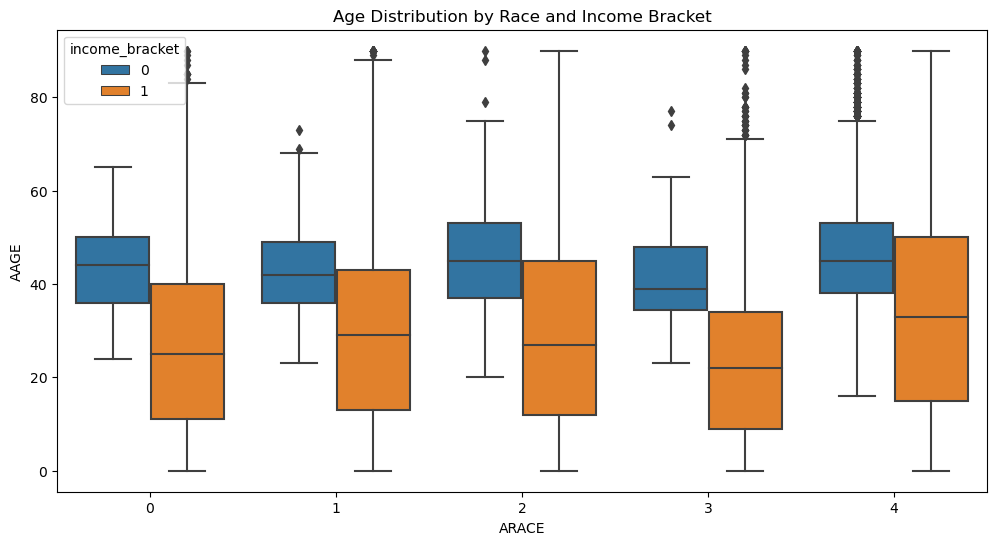

In [13]:
# Detailed Analysis
# Demographic influences on income
plt.figure(figsize=(12, 6))
sns.boxplot(x='ARACE', y='AAGE', hue='income_bracket', data=df_cleaned)
plt.title('Age Distribution by Race and Income Bracket')
plt.show()

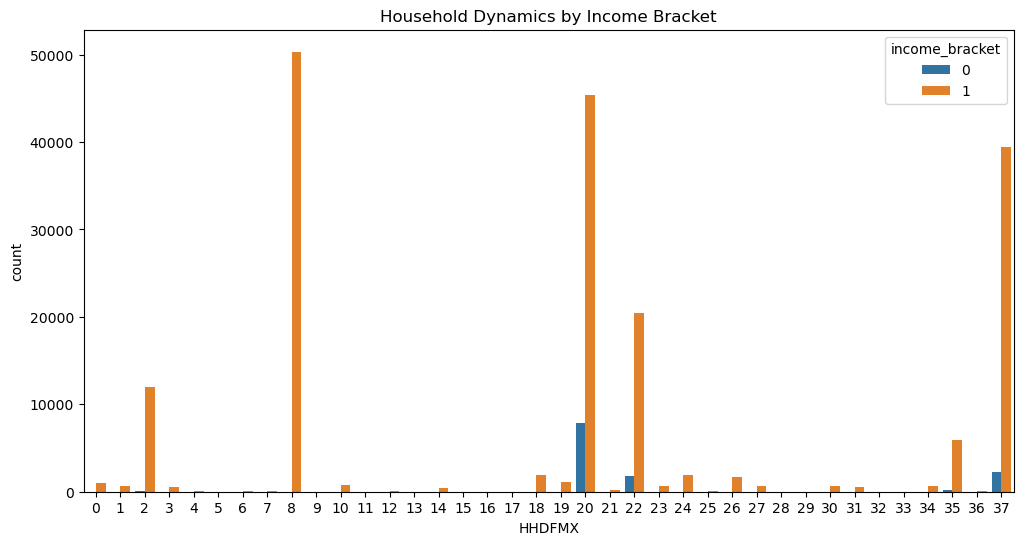

In [14]:
# Family and household dynamics
plt.figure(figsize=(12, 6))
sns.countplot(x='HHDFMX', hue='income_bracket', data=df_cleaned)
plt.title('Household Dynamics by Income Bracket')
plt.show()

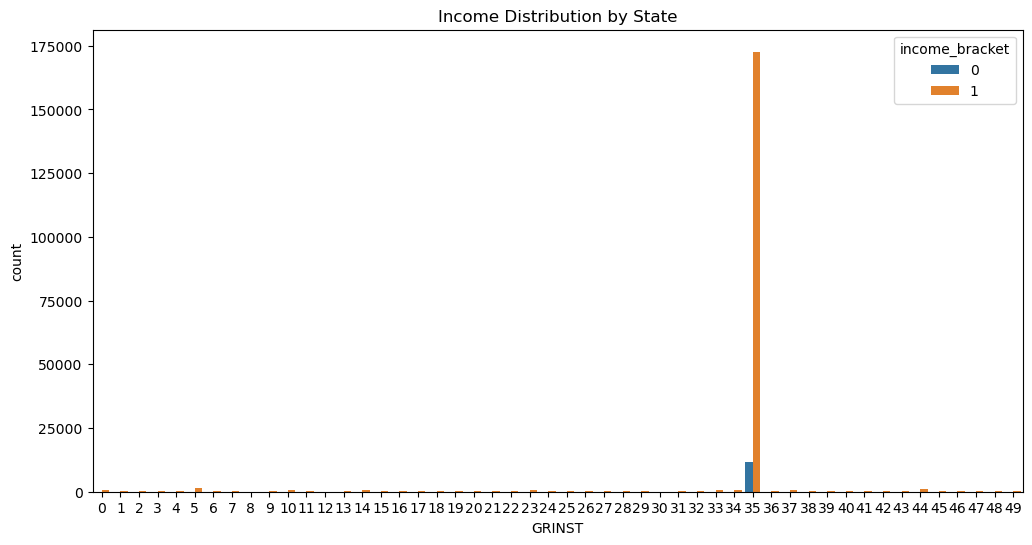

In [15]:
# Geographic and migration-related insights
plt.figure(figsize=(12, 6))
sns.countplot(x='GRINST', hue='income_bracket', data=df_cleaned)
plt.title('Income Distribution by State')
plt.show()

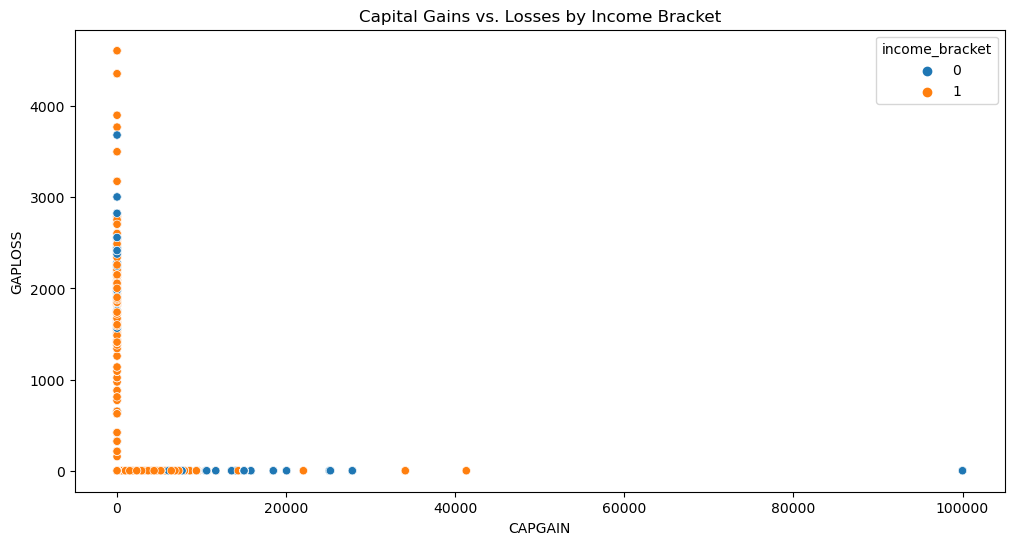

In [16]:
# Economic factors
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CAPGAIN', y='GAPLOSS', hue='income_bracket', data=df_cleaned)
plt.title('Capital Gains vs. Losses by Income Bracket')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


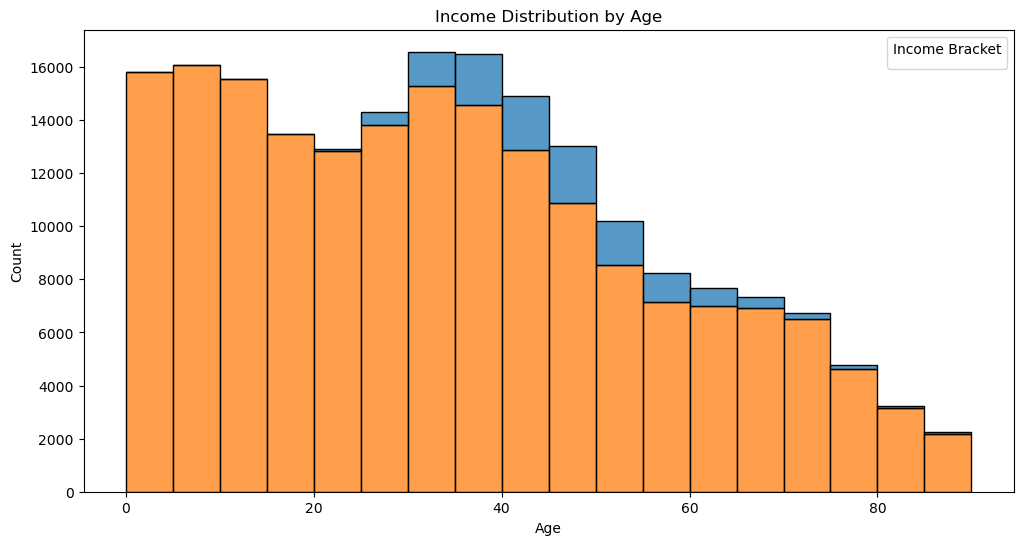

In [38]:
# Plotting income distribution by age
plt.figure(figsize=(12, 6))
sns.histplot(data=df_cleaned, x='AAGE', hue='income_bracket', multiple='stack', binwidth=5)
plt.title('Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income Bracket')
plt.show()

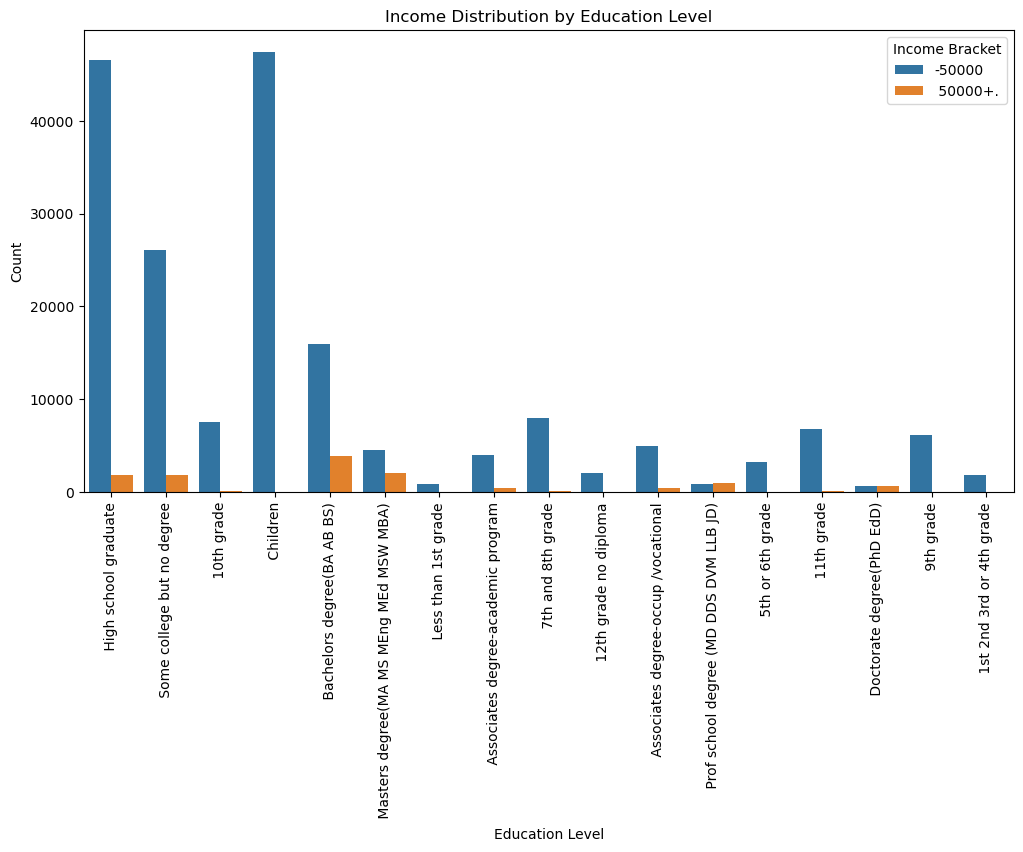

In [48]:
# Plotting income distribution by education level
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AHGA', hue='income_bracket')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Income Bracket')
plt.show()

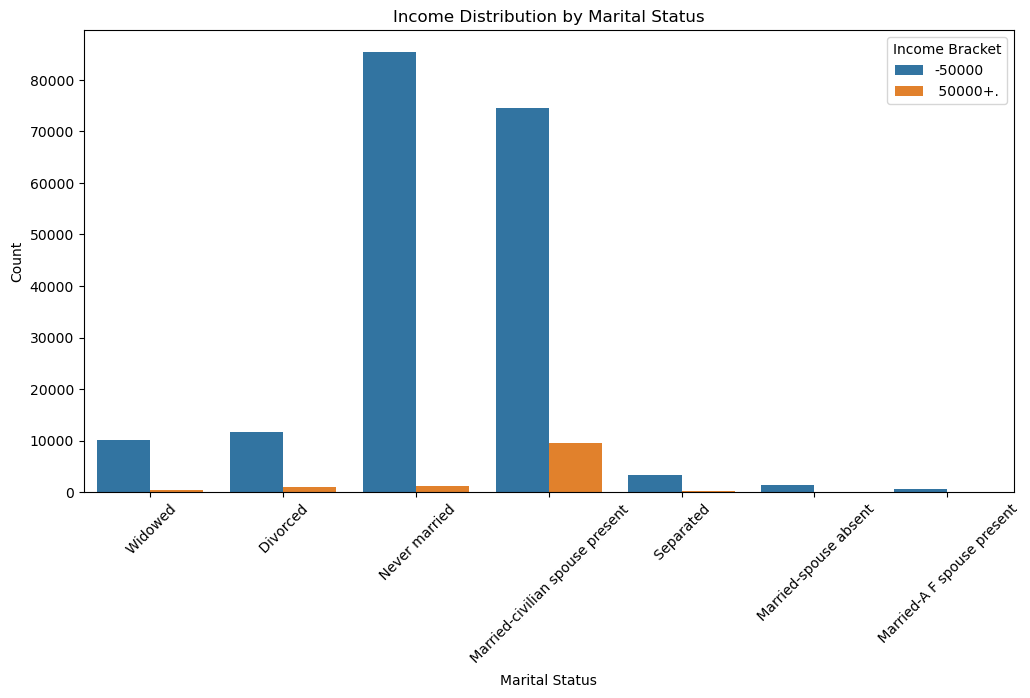

In [44]:
# Plotting income distribution by marital status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AMARITL', hue='income_bracket')
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income Bracket')
plt.show()

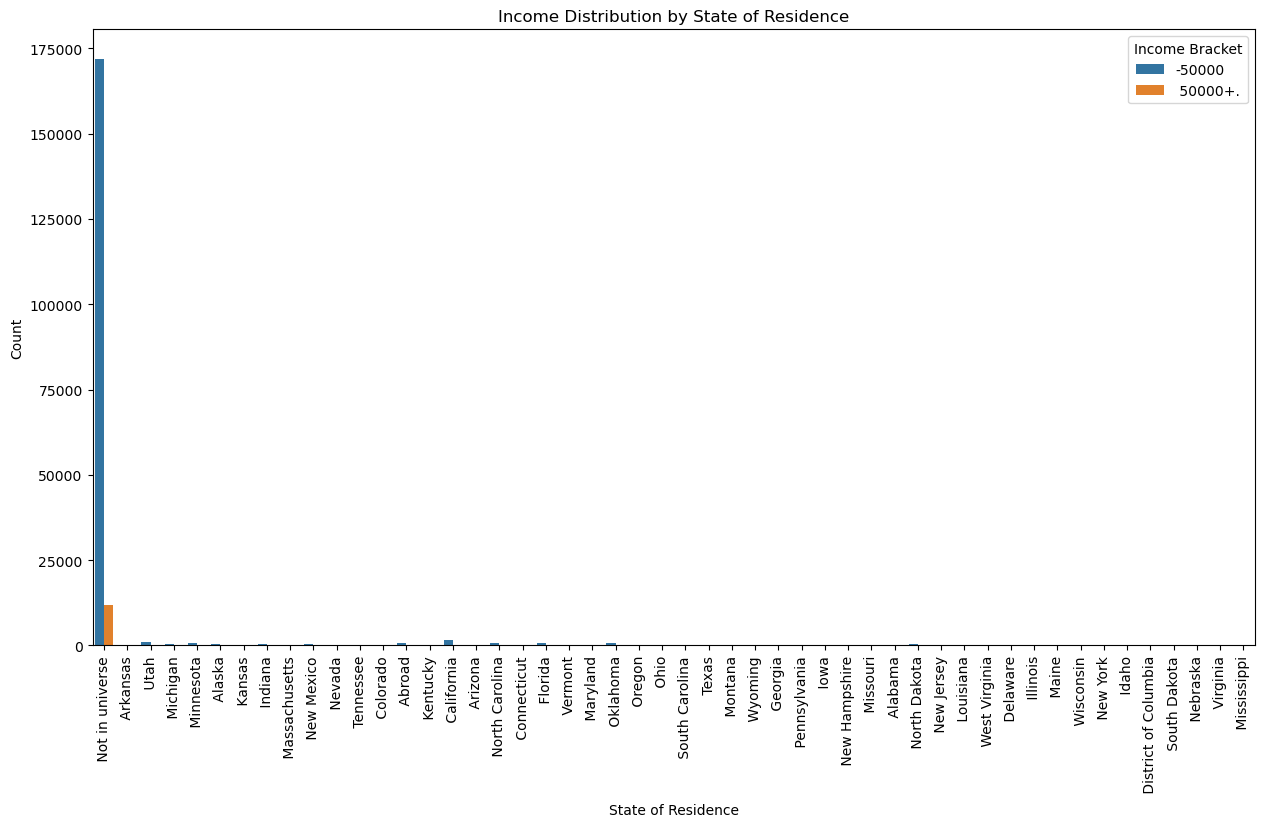

In [47]:
# Plotting income distribution by state of residence
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='GRINST', hue='income_bracket')
plt.title('Income Distribution by State of Residence')
plt.xlabel('State of Residence')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Income Bracket')
plt.show()

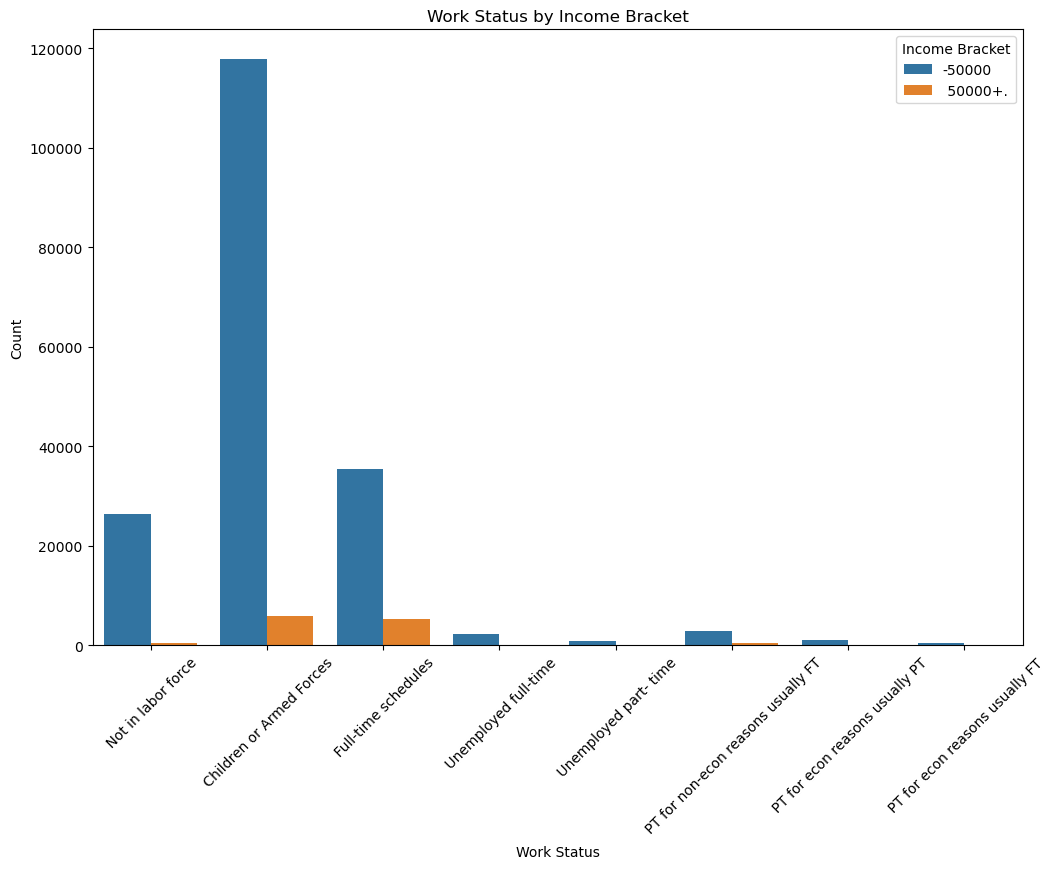

In [46]:
# Plotting work status by income bracket
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='AWKSTAT', hue='income_bracket')
plt.title('Work Status by Income Bracket')
plt.xlabel('Work Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Income Bracket')
plt.show()

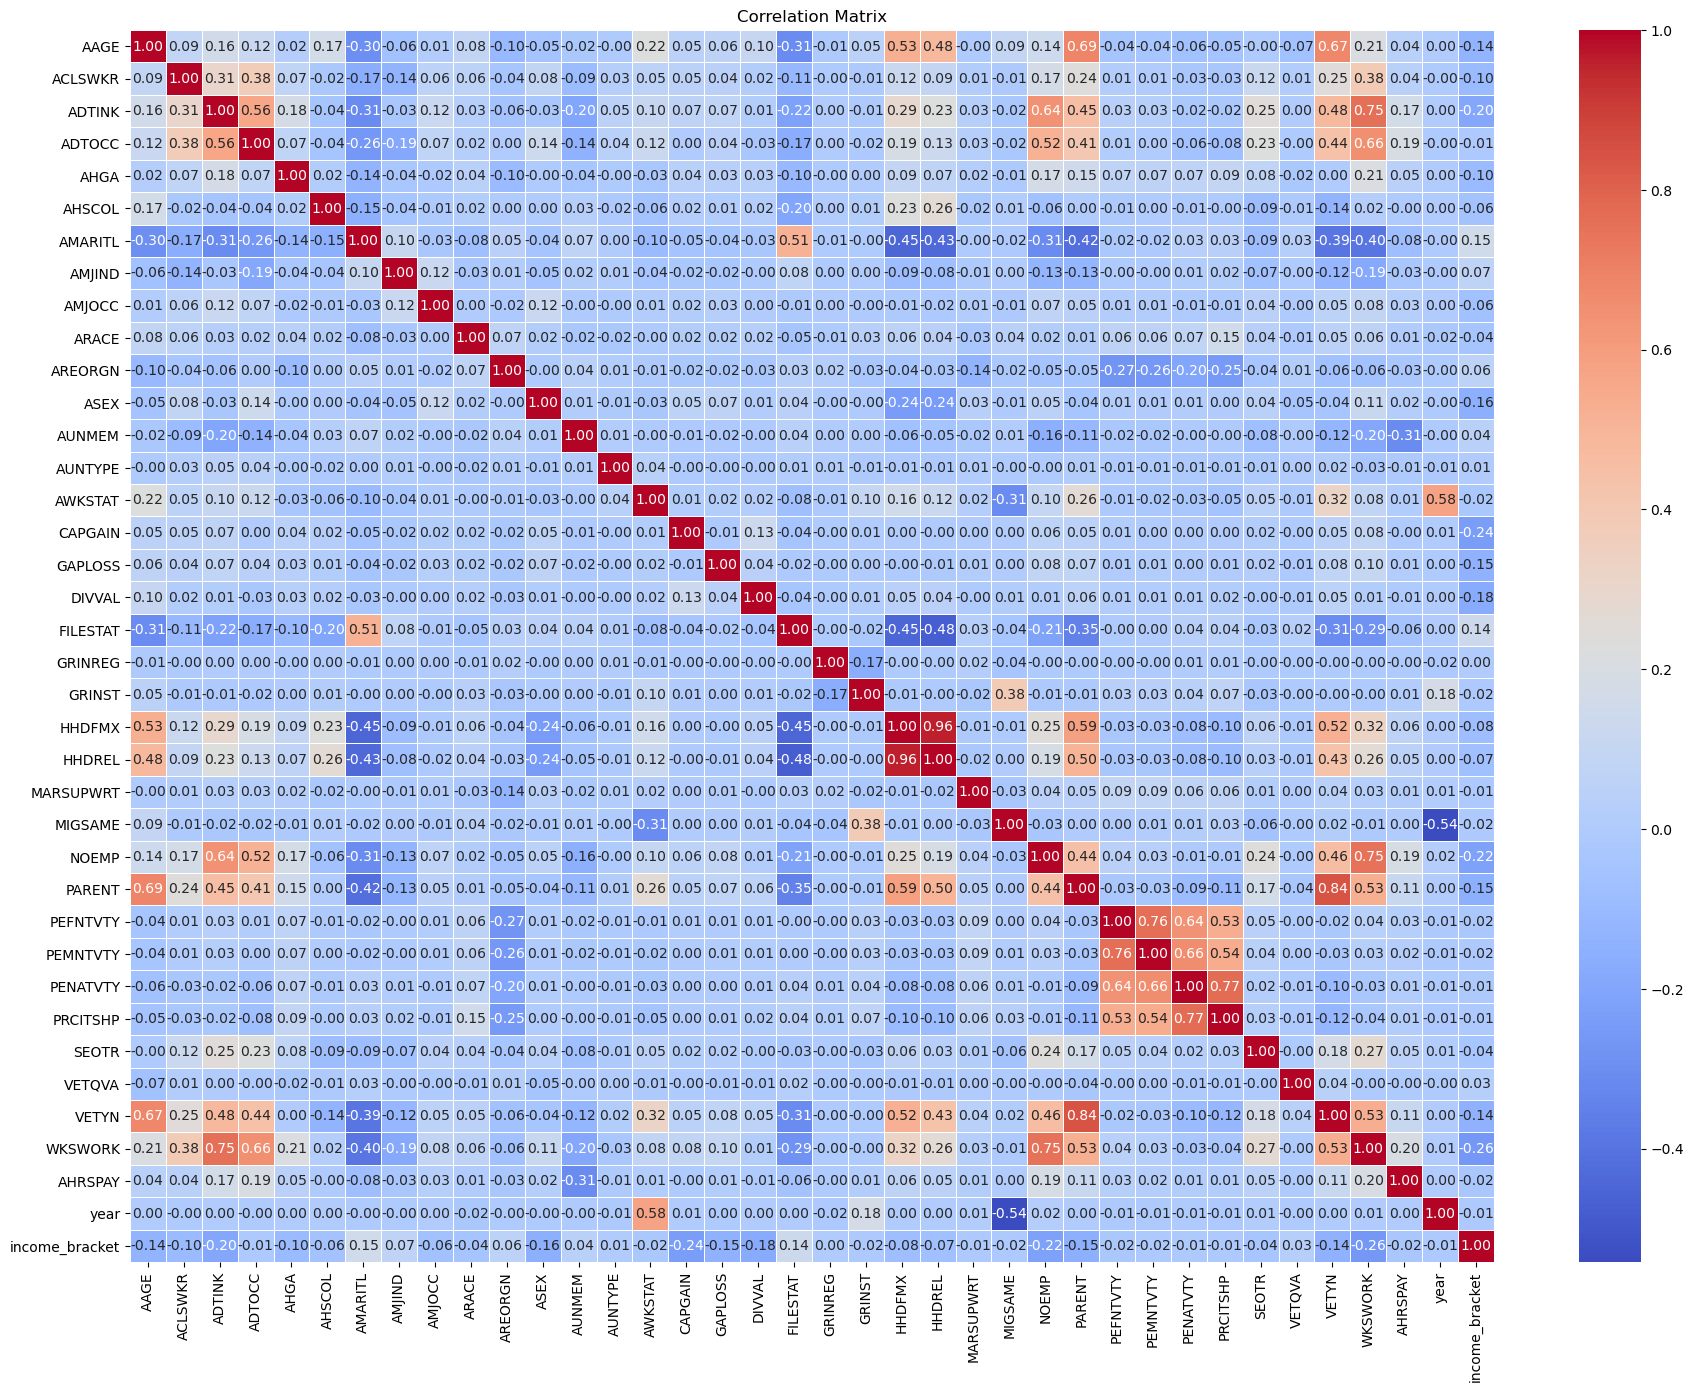

In [33]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plotting the correlation matrix using Seaborn heatmap
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()